In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-dataset/Employee.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
#1 How data looks like?
df=pd.read_csv('/kaggle/input/employee-dataset/Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
#2 How big data is?
df.shape

(4653, 9)

In [5]:
#3 Column datatypes?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [6]:
#Input features=8
#Target column= LeaveorNot
#There are total 4653 rows so we will 80% for training and 20% for testing.
#K-fold it 5 times.


In [7]:
#4 How data is mathematically?
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [8]:
#5 Are there any missing values?
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [9]:
# #6 Are there any duplicated row?
# df.duplicated().sum()

# EDA

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

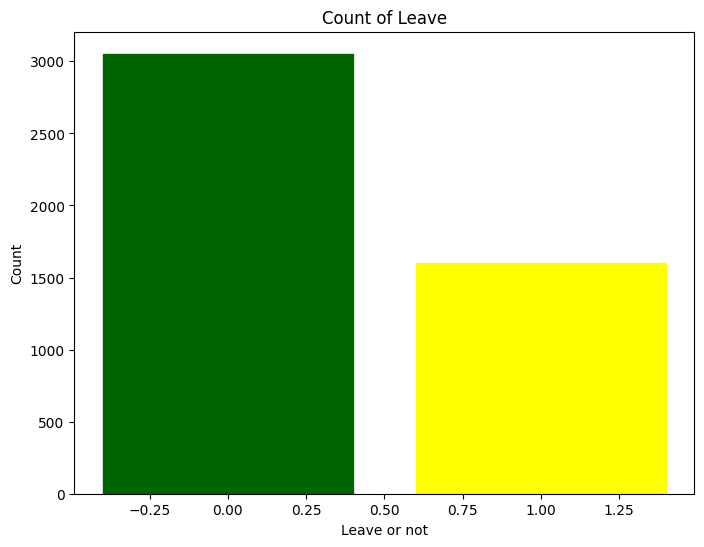

In [11]:
lc = df['LeaveOrNot'].value_counts()
plt.figure(figsize=(8, 6))
bars = plt.bar(lc.index, lc.values)
bars[0].set_color('darkgreen')  # Male
bars[1].set_color('yellow') 
plt.title('Count of Leave')
plt.xlabel('Leave or not')
plt.ylabel('Count')

plt.show()

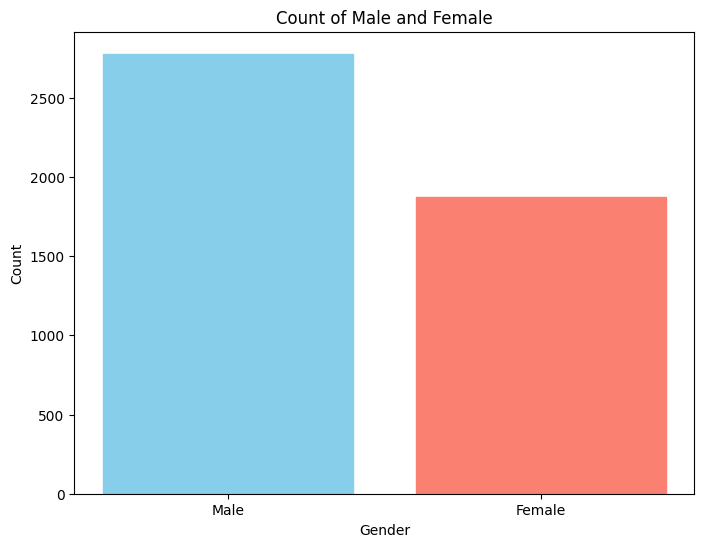

In [12]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))

bars = plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'salmon'])
bars[0].set_color('skyblue')  # Male
bars[1].set_color('salmon')   # Female

plt.title('Count of Male and Female')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


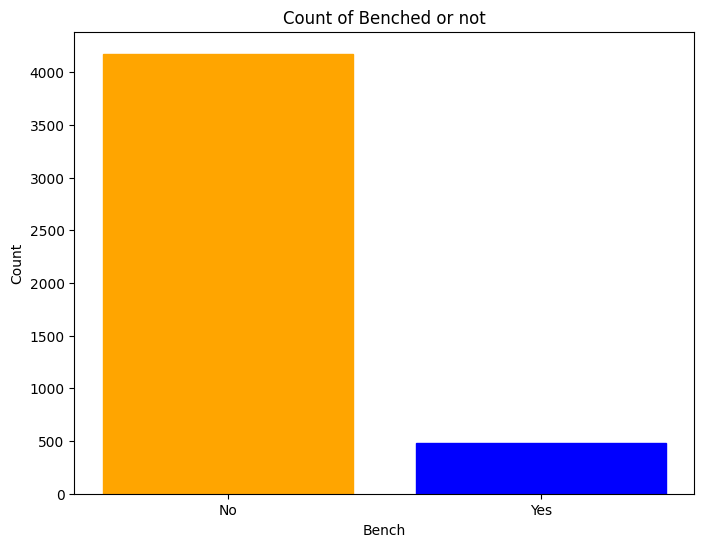

In [13]:
bench_counts = df['EverBenched'].value_counts()
plt.figure(figsize=(8, 6))

bars = plt.bar(bench_counts.index, bench_counts.values)
bars[0].set_color('orange')  
bars[1].set_color('blue')  

plt.title('Count of Benched or not')
plt.xlabel('Bench')
plt.ylabel('Count')
plt.show()


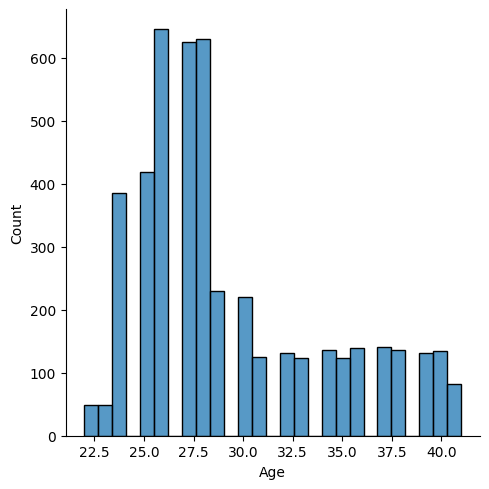

In [14]:
sns.displot(df['Age'])

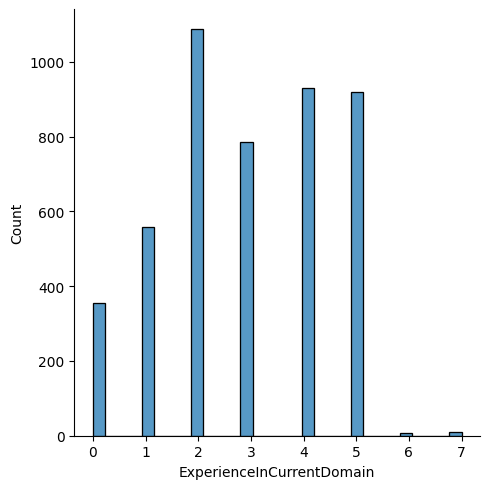

In [15]:
sns.displot(df['ExperienceInCurrentDomain'])

<Axes: ylabel='count'>

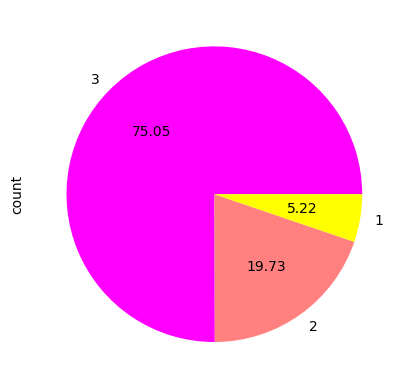

In [16]:
df['PaymentTier'].value_counts().plot(kind='pie',autopct='%.2f',colormap='spring')

<Axes: ylabel='count'>

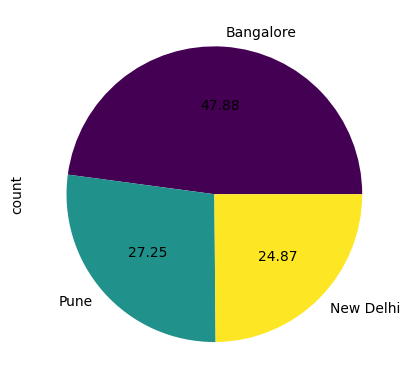

In [17]:
df['City'].value_counts().plot(kind='pie',autopct='%.2f',colormap='viridis')

<Axes: ylabel='count'>

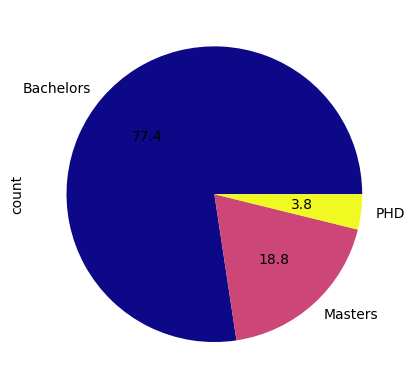

In [18]:
df['Education'].value_counts().plot(kind='pie',autopct='%.1f',colormap='plasma')

# Multivariate analysis 

In [19]:
# sns.scatterplot(x=df['Age'],y=df['ExperienceInCurrentDomain'],hue=df['Gender'],style=df['Education'])

<Axes: xlabel='LeaveOrNot', ylabel='Age'>

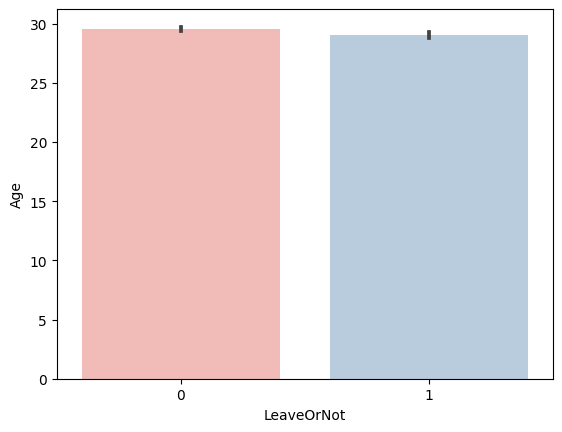

In [20]:
sns.barplot(x=df['LeaveOrNot'],y=df['Age'],palette='Pastel1')

<Axes: xlabel='Gender', ylabel='LeaveOrNot'>

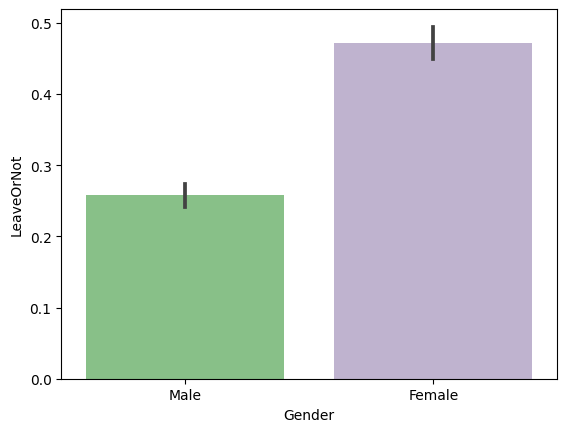

In [21]:
sns.barplot(y=df['LeaveOrNot'],x=df['Gender'],palette='Accent')

<Axes: xlabel='City', ylabel='LeaveOrNot'>

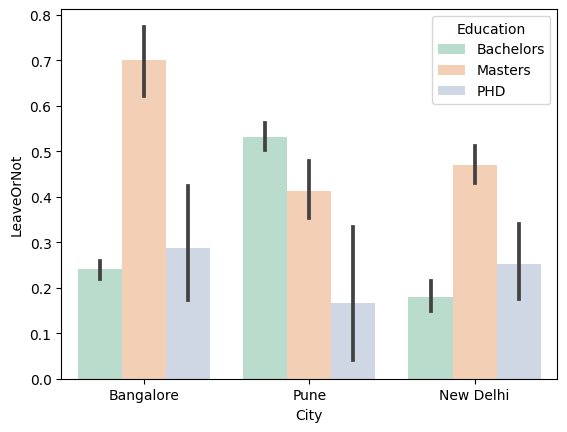

In [22]:
sns.barplot(y=df['LeaveOrNot'],x=df['City'],hue=df['Education'],palette='Pastel2')

<Axes: xlabel='City', ylabel='LeaveOrNot'>

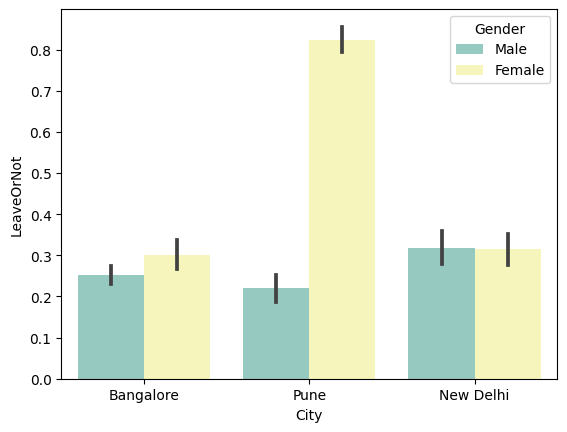

In [23]:
sns.barplot(y=df['LeaveOrNot'],x=df['City'],hue=df['Gender'],palette='Set3')

<Axes: xlabel='City', ylabel='LeaveOrNot'>

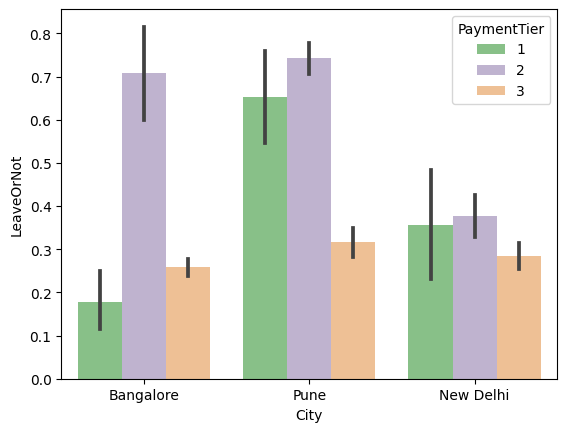

In [24]:
sns.barplot(y=df['LeaveOrNot'],x=df['City'],hue=df['PaymentTier'],palette='Accent')

<Axes: xlabel='City', ylabel='LeaveOrNot'>

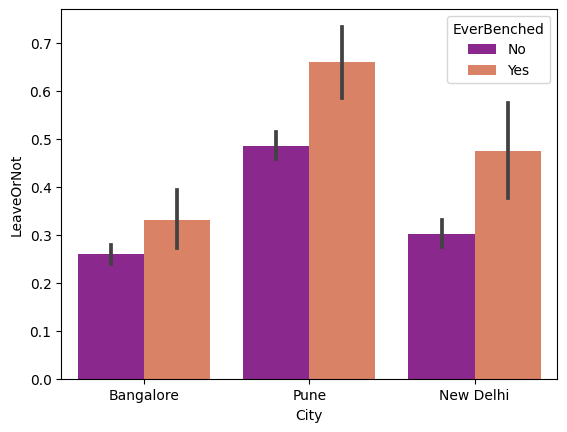

In [25]:
sns.barplot(y=df['LeaveOrNot'],x=df['City'],hue=df['EverBenched'],palette='plasma')

In [26]:
# sns.barplot(y=df['ExperienceInCurrentDomain'],x=df['City'],hue=df['LeaveOrNot'],palette='Pastel2')

In [27]:
percentages = df.groupby('City')['LeaveOrNot'].value_counts(normalize=True).mul(100).unstack().fillna(0)
import plotly.express as px


percentages_reset = percentages.reset_index()
percentages_melted = pd.melt(percentages_reset, id_vars='City', var_name='LeaveOrNot', value_name='Percentage')


fig = px.bar(percentages_melted, x='City', y='Percentage', color='LeaveOrNot', barmode='group',
             color_discrete_sequence=['skyblue', 'salmon'], labels={'Percentage': 'Percentage', 'City': 'City', 'LeaveOrNot': 'LeaveOrNot'})

fig.update_layout(title='Percentage of 0 and 1 in LeaveOrNot by City', xaxis_title='City', yaxis_title='Percentage')
fig.show()

In [28]:
# df['JoiningYear'] = pd.to_datetime(df['JoiningYear'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [30]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


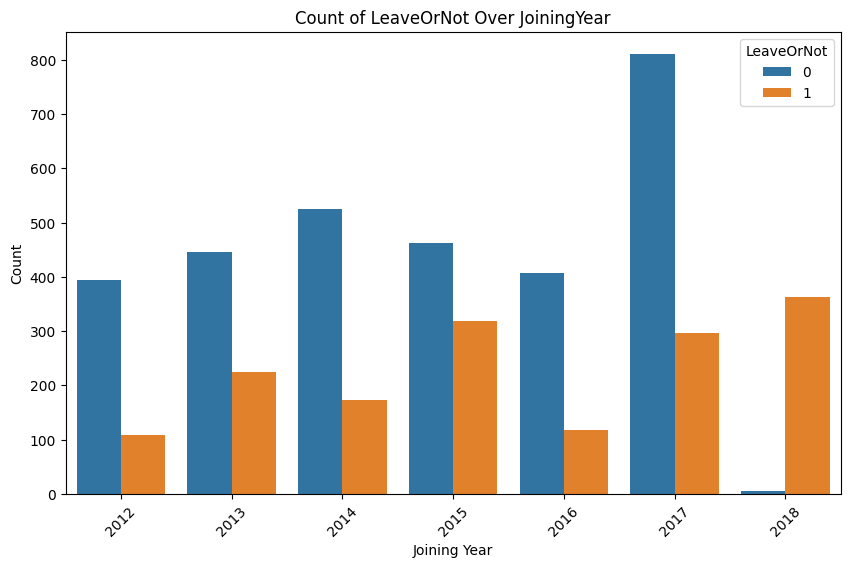

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['JoiningYear'], hue='LeaveOrNot', data=df)

plt.title('Count of LeaveOrNot Over JoiningYear')
plt.xlabel('Joining Year')
plt.ylabel('Count')
plt.legend(title='LeaveOrNot')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability, adjust as needed
plt.show()

Insights:
1. Females are more likey to leave compared to males so gender is important feature to decide whether employee will leave or not.

2. 77% of employees have done Bachlors while only 3.8% have done PHD.

3. In Banglore,employees done Masters have probability of 0.7 of leaving while in Pune employees done Bachlors have 0.5 probability of leaving.Employees done PHD and working in Pune have least probability of leaving(0.2).

4. Female employees of Pune have highest probabilty of leaving (0.8) while gender doesn't affect much in Banglore and New Delhi.

5. In Banglore, employees having payment tier 2 have very good probability of leaving (0.7) while in Pune employees having payment tier 1 and 2 are equally and highly to leave (0.7).Payment tier don't affect much in New Delhi.

6. 65% of employees of Pune if ever benched will leave while 47% of New Delhi will also leave if benched.Ever benched feature is least affected in Banglore city.

7. Most employees leave from Pune (50%) while around 70% of employees from New Delhi and Banglore don't leave so easily.

8. As the time passed, number of employees leaving increased.


# Data Pre-processing

In [32]:
df['Education']=df['Education'].map({'Bachelors':1,'Masters':2,'PHD':3})

In [33]:
df['City'].value_counts()

City
Bangalore    2228
Pune         1268
New Delhi    1157
Name: count, dtype: int64

In [34]:
df['EverBenched'].value_counts()

EverBenched
No     4175
Yes     478
Name: count, dtype: int64

In [35]:
df['EverBenched']=df['EverBenched'].map({'Yes':1,'No':0})

In [36]:
yearly_leave_count = df.groupby(['JoiningYear', 'LeaveOrNot']).size().unstack().fillna(0)

# Display the count of LeaveOrNot year-wise
print(yearly_leave_count)

LeaveOrNot     0    1
JoiningYear          
2012         395  109
2013         445  224
2014         526  173
2015         463  318
2016         408  117
2017         811  297
2018           5  362


In [37]:
yearly_leave_count = df.groupby(['JoiningYear', 'LeaveOrNot']).size().unstack().fillna(0)

# Calculate the percentages of 0 and 1 year-wise
yearly_leave_count['Percentage_0'] = (yearly_leave_count[0] / (yearly_leave_count[0] + yearly_leave_count[1])) * 100
yearly_leave_count['Percentage_1'] = (yearly_leave_count[1] / (yearly_leave_count[0] + yearly_leave_count[1])) * 100

# Display the percentage of 0 and 1 year-wise
print(yearly_leave_count[['Percentage_0', 'Percentage_1']])

LeaveOrNot   Percentage_0  Percentage_1
JoiningYear                            
2012            78.373016     21.626984
2013            66.517190     33.482810
2014            75.250358     24.749642
2015            59.282971     40.717029
2016            77.714286     22.285714
2017            73.194946     26.805054
2018             1.362398     98.637602


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   int64 
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   int64 
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 327.3+ KB


In [39]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,1,2017,Bangalore,3,34,Male,0,0,0
1,1,2013,Pune,1,28,Female,0,3,1
2,1,2014,New Delhi,3,38,Female,0,2,0
3,2,2016,Bangalore,3,27,Male,0,5,1
4,2,2017,Pune,3,24,Male,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,1,2013,Bangalore,3,26,Female,0,4,0
4649,2,2013,Pune,2,37,Male,0,2,1
4650,2,2018,New Delhi,3,27,Male,0,5,1
4651,1,2012,Bangalore,3,30,Male,1,2,0


In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
# Extracting the 'City' column
city_data = df[['City']]

# Initializing OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the 'City' column
city_encoded = ohe.fit_transform(city_data)

# Retrieving column names after encoding
encoded_cols = ohe.get_feature_names_out(['City'])

# Creating a DataFrame with encoded city columns
encoded_city_df = pd.DataFrame(city_encoded, columns=encoded_cols)

# Dropping the original 'City' column from the original DataFrame
df = df.drop('City', axis=1)

# Concatenating the original DataFrame with the encoded city DataFrame
df = pd.concat([df, encoded_city_df], axis=1)

# Display the updated DataFrame
print(df)

      Education  JoiningYear  PaymentTier  Age  Gender  EverBenched  \
0             1         2017            3   34    Male            0   
1             1         2013            1   28  Female            0   
2             1         2014            3   38  Female            0   
3             2         2016            3   27    Male            0   
4             2         2017            3   24    Male            1   
...         ...          ...          ...  ...     ...          ...   
4648          1         2013            3   26  Female            0   
4649          2         2013            2   37    Male            0   
4650          2         2018            3   27    Male            0   
4651          1         2012            3   30    Male            1   
4652          1         2015            3   33    Male            1   

      ExperienceInCurrentDomain  LeaveOrNot  City_New Delhi  City_Pune  
0                             0           0             0.0        0.0  
1

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [42]:
# Extracting the 'City' column
gender_data = df[['Gender']]

# Initializing OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the 'City' column
gender_encoded = ohe.fit_transform(gender_data)

# Retrieving column names after encoding
encoded_cols = ohe.get_feature_names_out(['Gender'])

# Creating a DataFrame with encoded city columns
encoded_gender_df = pd.DataFrame(gender_encoded, columns=encoded_cols)

# Dropping the original 'City' column from the original DataFrame
df = df.drop('Gender', axis=1)

# Concatenating the original DataFrame with the encoded city DataFrame
df = pd.concat([df, encoded_gender_df], axis=1)

# Display the updated DataFrame
print(df)

      Education  JoiningYear  PaymentTier  Age  EverBenched  \
0             1         2017            3   34            0   
1             1         2013            1   28            0   
2             1         2014            3   38            0   
3             2         2016            3   27            0   
4             2         2017            3   24            1   
...         ...          ...          ...  ...          ...   
4648          1         2013            3   26            0   
4649          2         2013            2   37            0   
4650          2         2018            3   27            0   
4651          1         2012            3   30            1   
4652          1         2015            3   33            1   

      ExperienceInCurrentDomain  LeaveOrNot  City_New Delhi  City_Pune  \
0                             0           0             0.0        0.0   
1                             3           1             0.0        1.0   
2                    

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [43]:
df['JoiningYear'] = pd.to_datetime(df['JoiningYear'], format='%Y')

In [44]:
df.corr()

,Education,JoiningYear,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,City_New Delhi,City_Pune,Gender_Male
Education,1.000000,0.142718,-0.140741,-0.010611,-0.052249,-0.004463,0.080497,0.397825,-0.051377,-0.010889
JoiningYear,0.142718,1.000000,-0.096125,0.013153,0.049344,-0.036517,0.181702,0.141796,-0.020174,-0.012207
PaymentTier,-0.140741,-0.096125,1.000000,0.007631,0.019207,0.018314,-0.197638,-0.102642,-0.229910,0.235119
Age,-0.010611,0.013153,0.007631,1.000000,-0.016135,-0.134643,-0.051126,-0.032461,-0.013273,-0.003866
EverBenched,-0.052249,0.049344,0.019207,-0.016135,1.000000,0.001408,0.078438,-0.029246,0.007534,0.019653
ExperienceInCurrentDomain,-0.004463,-0.036517,0.018314,-0.134643,0.001408,1.000000,-0.030504,-0.007608,-0.005690,0.008745
LeaveOrNot,0.080497,0.181702,-0.197638,-0.051126,0.078438,-0.030504,1.000000,-0.033341,0.206264,-0.220701
City_New Delhi,0.397825,0.141796,-0.102642,-0.032461,-0.029246,-0.007608,-0.033341,1.000000,-0.352096,-0.155877
City_Pune,-0.051377,-0.020174,-0.229910,-0.013273,0.007534,-0.005690,0.206264,-0.352096,1.000000,-0.083685
Gender_Male,-0.010889,-0.012207,0.235119,-0.003866,0.019653,0.008745,-0.220701,-0.155877,-0.083685,1.000000


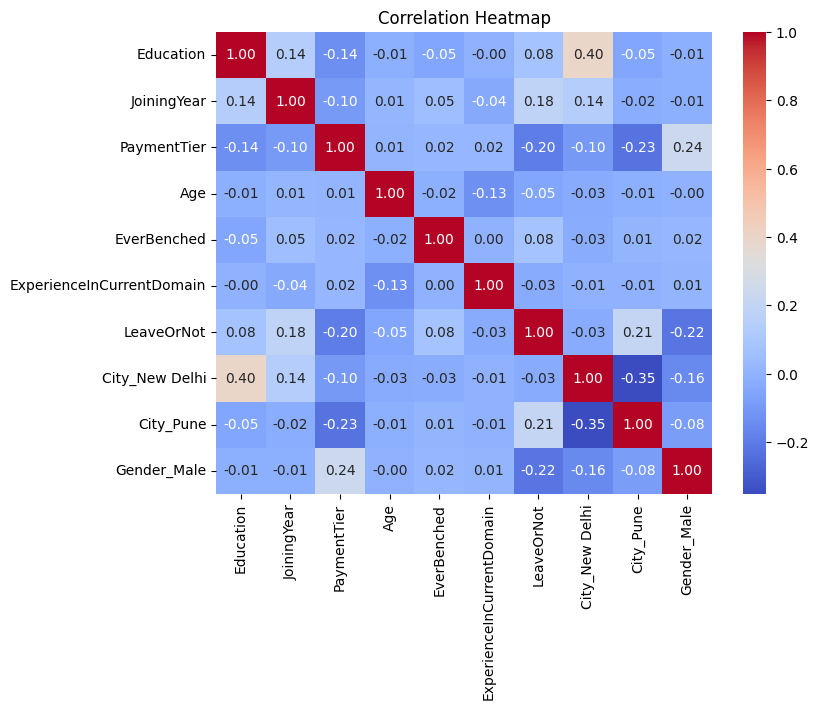

In [45]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [46]:
#From heatmap, it can observed that Joining Year, PaymentTier,City and Gender are important features to decide whether employee will leave or not.


In [47]:
df.head()

,Education,JoiningYear,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,City_New Delhi,City_Pune,Gender_Male
0,1,2017-01-01,3,34,0,0,0,0.0,0.0,1.0
1,1,2013-01-01,1,28,0,3,1,0.0,1.0,0.0
2,1,2014-01-01,3,38,0,2,0,1.0,0.0,0.0
3,2,2016-01-01,3,27,0,5,1,0.0,0.0,1.0
4,2,2017-01-01,3,24,1,2,1,0.0,1.0,1.0


In [48]:
desired_columns_order = [
    'Education', 'JoiningYear', 'PaymentTier', 'Age', 'EverBenched', 'ExperienceInCurrentDomain','Gender_Male',
     'City_New Delhi', 'City_Pune','LeaveOrNot']
df = df[desired_columns_order]

In [49]:
df.head()

,Education,JoiningYear,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain,Gender_Male,City_New Delhi,City_Pune,LeaveOrNot
0,1,2017-01-01,3,34,0,0,1.0,0.0,0.0,0
1,1,2013-01-01,1,28,0,3,0.0,0.0,1.0,1
2,1,2014-01-01,3,38,0,2,0.0,1.0,0.0,0
3,2,2016-01-01,3,27,0,5,1.0,0.0,0.0,1
4,2,2017-01-01,3,24,1,2,1.0,0.0,1.0,1


In [50]:
from sklearn.model_selection import train_test_split


In [51]:
X = df.drop(['LeaveOrNot'], axis=1)
y = df["LeaveOrNot"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [52]:
print("Training set - Class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTesting set - Class distribution:")
print(y_test.value_counts(normalize=True))

Training set - Class distribution:
LeaveOrNot
0    0.656099
1    0.343901
Name: proportion, dtype: float64

Testing set - Class distribution:
LeaveOrNot
0    0.656284
1    0.343716
Name: proportion, dtype: float64


In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
X_train

,Education,JoiningYear,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain,Gender_Male,City_New Delhi,City_Pune
4097,1,2012-01-01,3,38,0,1,0.0,1.0,0.0
1694,1,2018-01-01,3,26,0,4,1.0,0.0,0.0
2659,1,2016-01-01,3,27,0,5,1.0,0.0,1.0
3860,1,2016-01-01,3,36,0,4,1.0,0.0,0.0
1250,1,2017-01-01,3,27,1,5,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2699,2,2017-01-01,3,27,0,5,1.0,1.0,0.0
1847,1,2016-01-01,3,26,1,4,1.0,0.0,0.0
2955,2,2015-01-01,3,26,0,4,1.0,0.0,1.0
2148,1,2014-01-01,3,26,0,4,1.0,0.0,0.0


In [55]:
X_train['JoiningYear'] = X_train['JoiningYear'].dt.year
X_test['JoiningYear'] = X_test['JoiningYear'].dt.year

In [56]:
columns_to_scale = ['JoiningYear', 'Age', 'ExperienceInCurrentDomain']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform on the training data
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Apply the same transformation to the testing data
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# Displaying the updated X_train and X_test
print("Scaled Training Data:")
print(X_train.head())

print("\nScaled Testing Data:")
print(X_test.head())

Scaled Training Data:
      Education  JoiningYear  PaymentTier       Age  EverBenched  \
4097          1     0.000000            3  0.842105            0   
1694          1     1.000000            3  0.210526            0   
2659          1     0.666667            3  0.263158            0   
3860          1     0.666667            3  0.736842            0   
1250          1     0.833333            3  0.263158            1   

      ExperienceInCurrentDomain  Gender_Male  City_New Delhi  City_Pune  
4097                   0.142857          0.0             1.0        0.0  
1694                   0.571429          1.0             0.0        0.0  
2659                   0.714286          1.0             0.0        1.0  
3860                   0.571429          1.0             0.0        0.0  
1250                   0.714286          1.0             0.0        0.0  

Scaled Testing Data:
      Education  JoiningYear  PaymentTier       Age  EverBenched  \
832           2     0.833333       

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [58]:
# Creating instances of the models
knn = KNeighborsClassifier()
svc = SVC()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()

In [59]:
model_pipeline = [
    ('KNN', knn),
    ('SVC', svc),
    ('NaiveBayes', nb),
    ('DecisionTree', dt),
    ('RandomForest', rf),
    ('LogisticRegression', lr)
]

# Printing the list of models
print("List of Models:")
print(model_pipeline)

List of Models:
[('KNN', KNeighborsClassifier()), ('SVC', SVC()), ('NaiveBayes', GaussianNB()), ('DecisionTree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('LogisticRegression', LogisticRegression())]


In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_scores = {}
predictions = {}

# Iterate through each model in the pipeline
for name, model in model_pipeline:
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and store predictions
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc
    predictions[name] = y_pred

# Display accuracy scores for each model
print("Accuracy Scores:")
for name, acc in accuracy_scores.items():
    print(f"{name}: {acc:.4f}")

Accuracy Scores:
KNN: 0.8088
SVC: 0.7841
NaiveBayes: 0.7046
DecisionTree: 0.8067
RandomForest: 0.8324
LogisticRegression: 0.7465


In [62]:
from sklearn.metrics import accuracy_score

accuracy_scores = {}
predictions = {}

# Iterate through each model in the pipeline
for name, model in model_pipeline:
    # Fit the model on the entire data
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and store predictions on test data
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc
    predictions[name] = y_pred
    
    # Evaluate accuracy on the training set (optional)
    train_preds = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_preds)
    print(f"Model: {name}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {acc:.4f}\n")

# Display accuracy scores for each model
print("Accuracy Scores:")
for name, acc in accuracy_scores.items():
    print(f"{name}: {acc:.4f}")

Model: KNN
Training Accuracy: 0.8627
Testing Accuracy: 0.8088

Model: SVC
Training Accuracy: 0.7652
Testing Accuracy: 0.7841

Model: NaiveBayes
Training Accuracy: 0.6926
Testing Accuracy: 0.7046

Model: DecisionTree
Training Accuracy: 0.9296
Testing Accuracy: 0.8067

Model: RandomForest
Training Accuracy: 0.9296
Testing Accuracy: 0.8335

Model: LogisticRegression
Training Accuracy: 0.7273
Testing Accuracy: 0.7465

Accuracy Scores:
KNN: 0.8088
SVC: 0.7841
NaiveBayes: 0.7046
DecisionTree: 0.8067
RandomForest: 0.8335
LogisticRegression: 0.7465


In [63]:
# from sklearn.model_selection import GridSearchCV

# # Define hyperparameters for each model
# param_grid_knn = {'n_neighbors': [3, 5, 7,9],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
# param_grid_svc = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'auto']}
# param_grid_dt = {'max_depth': [3, 5, 7]}
# param_grid_rf = {'min_samples_split': [3, 5, 10], 
#     'n_estimators' : [100, 300],
#     'max_depth': [3, 5, 15, 25],
#     'max_features': [3, 5, 10, 20]}
# param_grid_lr = {'classifier' : [LogisticRegression()],
#      'classifier__penalty' : ['l1', 'l2'],
#     'classifier__C' : np.logspace(-4, 4, 20),
#     'classifier__solver' : ['liblinear']}

# # Create a list of tuples containing model name and its hyperparameters grid
# param_grids = [
#     ('KNN', KNeighborsClassifier(), param_grid_knn),
#     ('SVC', SVC(), param_grid_svc),
#     ('DecisionTree', DecisionTreeClassifier(), param_grid_dt),
#     ('RandomForest', RandomForestClassifier(), param_grid_rf),
#     ('LogisticRegression', LogisticRegression(), param_grid_lr)
# ]

# # Dictionary to store best models after GridSearchCV
# best_models = {}

# # Loop through each model to perform GridSearchCV
# for name, model, param_grid in param_grids:
#     grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
#     grid_search.fit(X_train, y_train)
#     best_models[name] = grid_search.best_estimator_
#     print(f"Best parameters for {name}: {grid_search.best_params_}")

# # Evaluating best models on test data and printing accuracy scores
# print("\nAccuracy Scores after GridSearchCV:")
# for name, model in best_models.items():
#     y_pred = model.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     print(f"{name}: {acc:.4f}")

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
param_grid_svc = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'auto']}
param_grid_dt = {'max_depth': [3, 5, 7]}
param_grid_rf = {'min_samples_split': [3, 5, 10], 
                 'n_estimators': [100, 300],
                 'max_depth': [3, 5, 15, 25],
                 'max_features': [3, 5, 10, 20]}
param_grid_lr = {'penalty': ['l1', 'l2'],
                 'C': np.logspace(-4, 4, 20),
                 'solver': ['liblinear']}

# Create a list of tuples containing model name and its hyperparameters grid
param_grids = [
    ('KNN', KNeighborsClassifier(), param_grid_knn),
    ('SVC', SVC(), param_grid_svc),
    ('DecisionTree', DecisionTreeClassifier(), param_grid_dt),
    ('RandomForest', RandomForestClassifier(), param_grid_rf),
    ('LogisticRegression', LogisticRegression(), param_grid_lr)
]

# Dictionary to store best models after GridSearchCV
best_models = {}

# Loop through each model to perform GridSearchCV
for name, model, param_grid in param_grids:
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

# Evaluating best models on training and test data and printing accuracy scores
print("\nAccuracy Scores after GridSearchCV:")
for name, model in best_models.items():
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    print(f"{name} - Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}")

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best parameters for SVC: {'C': 10, 'gamma': 1}
Best parameters for DecisionTree: {'max_depth': 7}
Best parameters for RandomForest: {'max_depth': 25, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 100}
Best parameters for LogisticRegression: {'C': 0.08858667904100823, 'penalty': 'l2', 'solver': 'liblinear'}

Accuracy Scores after GridSearchCV:
KNN - Train Accuracy: 0.855, Test Accuracy: 0.827
SVC - Train Accuracy: 0.870, Test Accuracy: 0.850
DecisionTree - Train Accuracy: 0.860, Test Accuracy: 0.857
RandomForest - Train Accuracy: 0.891, Test Accuracy: 0.849
LogisticRegression - Train Accuracy: 0.724, Test Accuracy: 0.747


In [ ]:
# import time

# # Dictionary to store prediction times for each model
# prediction_times = {}

# # Loop through each best model and record prediction time
# for name, model in best_models.items():
#     start_time = time.time()
#     model.predict(X_test)
#     end_time = time.time()
#     time_taken = end_time - start_time
#     prediction_times[name] = time_taken

# # Display prediction times for each model
# print("Prediction Times for each model:")
# for name, time_taken in prediction_times.items():
#     print(f"{name}: {time_taken:.6f} seconds")

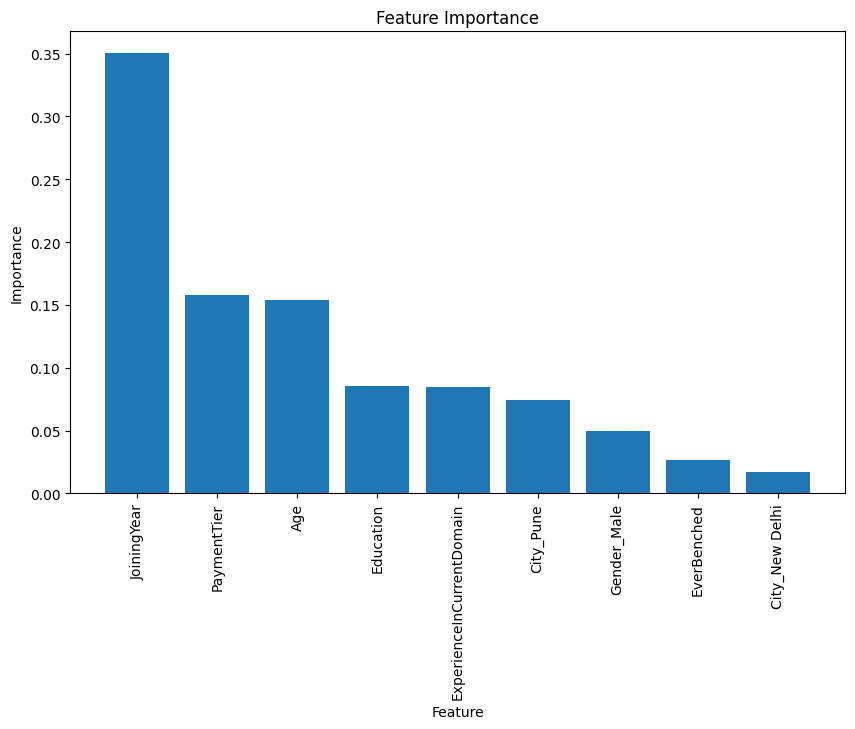

In [68]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Assuming you have X_train, y_train and a trained DecisionTreeClassifier model (for example, best_models['DecisionTree'])

# Train a Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = (-importances).argsort()

# Rearrange feature names based on importance
names = X_train.columns[indices]

# Plotting feature importances
plt.figure(figsize=(10,6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [69]:
import time

# Dictionary to store prediction times for each model
prediction_times = {}

# Loop through each model and measure prediction time
for name, model in best_models.items():
    start_time = time.time()  # Start time before making predictions
    model.predict(X_test)     # Predict on the test set
    end_time = time.time()    # End time after making predictions
    elapsed_time = end_time - start_time  # Calculate elapsed time
    prediction_times[name] = elapsed_time  # Store elapsed time for the model
    
# Display prediction times for each model
print("Prediction Times:")
for name, time_taken in prediction_times.items():
    print(f"{name}: {time_taken:.6f} seconds")


Prediction Times:
KNN: 0.099180 seconds
SVC: 0.085008 seconds
DecisionTree: 0.002151 seconds
RandomForest: 0.024724 seconds
LogisticRegression: 0.002080 seconds


In [70]:
import time
from sklearn.metrics import accuracy_score

# Best parameters obtained from GridSearchCV
best_params = {
    'KNN': {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'},
    'SVC': {'C': 10, 'gamma': 1},
    'DecisionTree': {'max_depth': 7},
    'RandomForest': {'max_depth': 25, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 100},
    'LogisticRegression': {'C': 0.08858667904100823, 'penalty': 'l2', 'solver': 'liblinear'}
}

# Create instances of models with best parameters
best_models = {
    'KNN': KNeighborsClassifier(**best_params['KNN']),
    'SVC': SVC(**best_params['SVC']),
    'DecisionTree': DecisionTreeClassifier(**best_params['DecisionTree']),
    'RandomForest': RandomForestClassifier(**best_params['RandomForest']),
    'LogisticRegression': LogisticRegression(**best_params['LogisticRegression'])
}

# Dictionary to store accuracy scores and prediction times for each model with best parameters
results = {}

# Loop through each model and measure prediction time using best parameters on y_test labels
for name, model in best_models.items():
    start_time = time.time()  # Start time before making predictions
    model.fit(X_train, y_train)  # Fit the model with best parameters
    y_pred = model.predict(X_test)  # Predict on the test set
    end_time = time.time()  # End time after making predictions
    elapsed_time = end_time - start_time  # Calculate elapsed time
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Store accuracy and elapsed time for the model
    results[name] = {'Accuracy': acc, 'Prediction Time': elapsed_time}

# Display accuracy and prediction time for each model using best parameters
print("Accuracy and Prediction Times using Best Parameters for y_test:")
for name, metrics in results.items():
    print(f"{name}: Accuracy - {metrics['Accuracy']:.4f}, Prediction Time - {metrics['Prediction Time']:.6f} seconds")


Accuracy and Prediction Times using Best Parameters for y_test:
KNN: Accuracy - 0.8271, Prediction Time - 0.104553 seconds
SVC: Accuracy - 0.8496, Prediction Time - 0.596286 seconds
DecisionTree: Accuracy - 0.8571, Prediction Time - 0.012152 seconds
RandomForest: Accuracy - 0.8485, Prediction Time - 0.539819 seconds
LogisticRegression: Accuracy - 0.7465, Prediction Time - 0.013407 seconds


In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# import joblib

# # Assuming you have already trained the Decision Tree model (best_models['DecisionTree'])
# # Replace 'best_models['DecisionTree']' with your trained Decision Tree model

# # Save the model to a file
# joblib.dump(best_models['DecisionTree'], 'decision_tree_model.pkl')

In [71]:
from sklearn.tree import DecisionTreeClassifier

# Best parameters for Decision Tree obtained from GridSearchCV
best_params_decision_tree = {
    'max_depth': 7  # Replace this with your best parameters for Decision Tree
}

# Create a Decision Tree Classifier instance with best parameters
dt = DecisionTreeClassifier(**best_params_decision_tree)

# Train the model with the best parameters
dt.fit(X_train, y_train)

# Predict using the trained model
y_pred_decision_tree = dt.predict(X_test)

# Calculate accuracy for Decision Tree
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

# Display accuracy for Decision Tree using best parameters
print(f"Accuracy for Decision Tree using Best Parameters: {accuracy_decision_tree:.4f}")


Accuracy for Decision Tree using Best Parameters: 0.8571


In [72]:
from sklearn.tree import DecisionTreeClassifier
import joblib

# Assuming you have already trained the Decision Tree model (best_models['DecisionTree'])
# Replace 'best_models['DecisionTree']' with your trained Decision Tree model

# Save the model to a file
joblib.dump(dt, 'dt_model.pkl')

['dt_model.pkl']

In [ ]:
X_test

In [73]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 931 entries, 832 to 3975
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  931 non-null    int64  
 1   JoiningYear                931 non-null    float64
 2   PaymentTier                931 non-null    int64  
 3   Age                        931 non-null    float64
 4   EverBenched                931 non-null    int64  
 5   ExperienceInCurrentDomain  931 non-null    float64
 6   Gender_Male                931 non-null    float64
 7   City_New Delhi             931 non-null    float64
 8   City_Pune                  931 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 72.7 KB


In [ ]:
# for i in best_models.items():
#     print(i.fit())

In [75]:
single_instance = X_test.iloc[3].values  # Selecting the first instance (change index as needed)
single_instance_2d = single_instance.reshape(1, -1)  # Reshape to a 2D array
prediction = dt.predict(single_instance_2d)  # Predict for the single instance
print(prediction)

[0]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
print(X_test,y_test)

In [76]:
single_instance_2d
#Education,JoiningYear,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain,Gender_Male,City_New_Delhi,City_Pune)
#2 2014 3 40 1 5.0 0 0 0

array([[1.        , 0.5       , 3.        , 0.47368421, 0.        ,
        0.        , 1.        , 1.        , 0.        ]])

In [77]:
X_test.columns

Index(['Education', 'JoiningYear', 'PaymentTier', 'Age', 'EverBenched',
       'ExperienceInCurrentDomain', 'Gender_Male', 'City_New Delhi',
       'City_Pune'],
      dtype='object')